In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = x_train/255.0
x_test = x_test/255.0

y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
model = Sequential([
    LSTM(128, input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

d:\conda_env\tensorflow\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [6]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
                metrics=['accuracy'])

history = model.fit(x_train, y_train_cat, epochs=10, batch_size=128, validation_data=(x_test, y_test_cat))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 77ms/step - accuracy: 0.6740 - loss: 0.9753 - val_accuracy: 0.9403 - val_loss: 0.1992
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9483 - loss: 0.1676 - val_accuracy: 0.9624 - val_loss: 0.1187
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 76ms/step - accuracy: 0.9635 - loss: 0.1170 - val_accuracy: 0.9739 - val_loss: 0.0834
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 73ms/step - accuracy: 0.9743 - loss: 0.0839 - val_accuracy: 0.9729 - val_loss: 0.0859
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9785 - loss: 0.0688 - val_accuracy: 0.9686 - val_loss: 0.1014
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9827 - loss: 0.0546 - val_accuracy: 0.9789 - val_loss: 0.0654
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 58ms/step - accuracy: 0.9855 - loss: 0.0463 - val_accuracy: 0.9851 - val_loss: 0.0496
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 28s 59ms/step - accuracy: 0.9882 - loss: 0.0382 - 

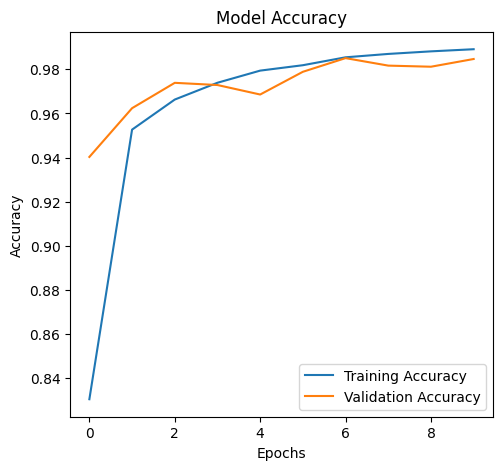

In [7]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

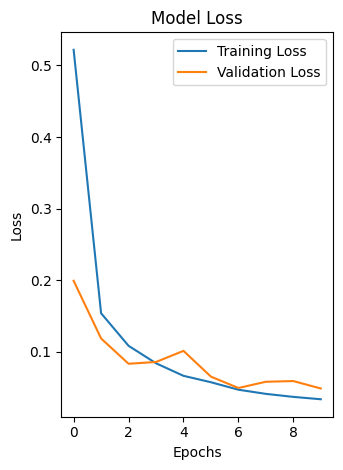

In [8]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


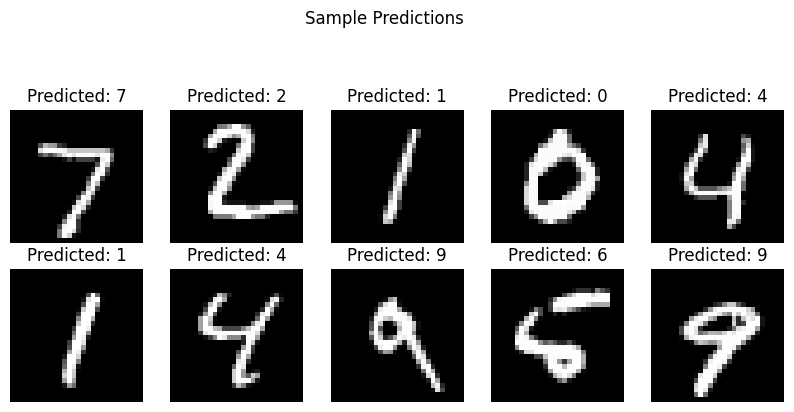

In [9]:
predictions = model.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'Predicted: {predicted_classes[i]}')
    plt.axis('off')
plt.suptitle('Sample Predictions')
plt.show()